# Pivot Table and Panel for Data Presentation


A panel is a 3D container of data. The term Panel data is derived from econometrics and is partially responsible for the name pandas − pan(el)-da(ta)-s.

https://www.tutorialspoint.com/python_pandas/python_pandas_panel.htm


Tutorials for using Panels in Pandas

https://python.quantecon.org/pandas_panel.html  Thomas J. Sargent and John Stachurski 2020.

In [1]:
import sys, os, os.path
import datetime as dt

import numpy as np
import pandas as pd

import talib
from talib.abstract import *

pd.options.mode.chained_assignment = None # Suppress warning

if not 'EXPERIMENT_HOME' in os.environ: # Configure local paths if not already defined
    ML_HOME = os.path.abspath(os.path.join("..","ml_home")) # ML workspace
    EXPERIMENT_HOME = os.path.abspath(os.path.join(ML_HOME, "..")) # Experiment workspace
    DATA_HOME = os.path.abspath(os.path.join(EXPERIMENT_HOME,"dataset","historical")) # Dataset location
    os.environ["EXPERIMENT_HOME"] = EXPERIMENT_HOME
    os.environ["DATA_HOME"] = DATA_HOME
    sys.path.insert(0, EXPERIMENT_HOME)
    sys.path.insert(0, ML_HOME) # Add to path so can load our library
    os.chdir(EXPERIMENT_HOME) # Change working directory to experiment workspace
print("Experiment Home: ", os.path.abspath(os.curdir), "; Data Home:", DATA_HOME)

Experiment Home:  /home/jovyan ; Data Home: /home/jovyan/dataset/historical


## 1. Choose start/end period

## 2. Choose ticker symbols

In [2]:


period_start='2014-01-01'
period_end='2014-12-31'

symbols = ["SCB","KBANK","AOT","BTS","AP","LH","CPF","KSL","PTT","RATCH"]

sectors = {
    "Financials" : ["SCB", "KBANK"],
    "Services" : ["AOT", "BTS"],
    "Property & Construction" : ["AP", "LH"], 
    "Agro & Food Industry" : ["CPF", "KSL"], 
    "Resources" : ["PTT", "RATCH"]
}

industries = {
    "Banking" : ["SCB", "KBANK"],
    "Transportation & Logistics" : ["AOT", "BTS"],
    "Property Development" : ["AP", "LH"], 
    "Food & Beverage" : ["CPF", "KSL"], 
    "Energy & Utilities" : ["PTT", "RATCH"]
}

data = {}
for s in symbols:
    
    # Read series
    df = pd.read_csv(os.path.join(DATA_HOME,"%s.csv" % s), index_col=0)
    # Add column ticker
    df.loc[:,('Date')] = df.index
    df['Ticker'] = s
    
    # Add sector column
    for k, sect in sectors.items():
        if s in sect:
            df['Sector'] = k

    # Add industry column
    for k, indus in industries.items():
        if s in indus:
            df['Industry'] = k
        
    # Add to dictionary
    data[s] = df[period_start:period_end]

# Select single stock series for analysis    
ticker = "SCB"
df = data[ticker]
df.index = pd.to_datetime(df.index)

In [3]:
# Stack dataframes together
# https://stackoverflow.com/questions/29351840/stack-two-pandas-data-frames

rows = []

for k, d in data.items():
    rows.append(d)

df = pd.concat(rows, ignore_index=True)
df

,High,Low,Open,Close,Volume,Adj Close,Date,Ticker,Sector,Industry
0,142.00,131.50,141.50,131.50,14726700.0,98.861626,2014-01-02,SCB,Financials,Banking
1,135.50,131.00,132.00,132.50,15410800.0,99.613434,2014-01-03,SCB,Financials,Banking
2,140.00,130.50,132.00,140.00,12798300.0,105.251930,2014-01-06,SCB,Financials,Banking
3,144.00,139.00,141.00,144.00,9352800.0,108.259125,2014-01-07,SCB,Financials,Banking
4,144.50,140.00,143.50,140.50,10750100.0,105.627823,2014-01-08,SCB,Financials,Banking
...,...,...,...,...,...,...,...,...,...,...
2445,60.00,59.25,59.75,59.50,322400.0,47.158009,2014-12-24,RATCH,Resources,Energy & Utilities
2446,59.75,58.50,59.00,59.75,429900.0,47.356159,2014-12-25,RATCH,Resources,Energy & Utilities
2447,59.75,58.50,59.75,59.50,533900.0,47.158009,2014-12-26,RATCH,Resources,Energy & Utilities
2448,59.75,58.50,59.50,58.75,823500.0,46.563583,2014-12-29,RATCH,Resources,Energy & Utilities


# Pivot table: Value=Close


In [4]:
ptable = df.pivot_table(values='Close', index='Date', columns=['Industry', 'Sector', 'Ticker'])

ptable

Industry      Banking        Energy & Utilities             Food & Beverage  \
Sector     Financials                 Resources        Agro & Food Industry   
Ticker          KBANK    SCB                PTT  RATCH                  CPF   
Date                                                                          
2014-01-02      145.5  131.5          27.400000  46.25                30.50   
2014-01-03      151.0  132.5          26.799999  46.50                30.50   
2014-01-06      157.0  140.0          26.400000  46.75                29.25   
2014-01-07      162.0  144.0          28.100000  47.25                30.50   
2014-01-08      162.0  140.5          28.500000  47.75                29.75   
...               ...    ...                ...    ...                  ...   
2014-12-24      231.0  184.5          33.700001  59.50                27.50   
2014-12-25      229.0  183.0          32.799999  59.75                27.25   
2014-12-26      230.0  184.5          33.000000  59.50                27.75   
2014-12-29      229.0  183.0          32.599998  58.75                27.50   
2014-12-30      229.0  182.0          32.400002  58.75                27.25   

Industry               Property Development           \
Sector              Property & Construction            
Ticker          KSL                      AP       LH   
Date                                                   
2014-01-02  5.40909                 3.87273  7.00000   
2014-01-03  5.36364                 3.81818  6.91667   
2014-01-06  5.40909                 3.80000  6.95833   
2014-01-07  5.36364                 3.94545  7.16667   
2014-01-08  5.36364                 3.92727  7.00000   
...             ...                     ...      ...   
2014-12-24  5.40909                 6.20000  9.20000   
2014-12-25  5.40909                 6.05000  9.10000   
2014-12-26  5.63636                 6.00000  9.15000   
2014-12-29  5.36364                 5.95000  9.15000   
2014-12-30  5.36364                 5.95000  9.05000   

Industry   Transportation & Logistics        
Sector                       Services        
Ticker                            AOT   BTS  
Date                                         
2014-01-02                  14.650000  8.20  
2014-01-03                  14.500000  7.95  
2014-01-06                  14.250000  7.90  
2014-01-07                  15.150000  8.15  
2014-01-08                  14.500000  8.05  
...                               ...   ...  
2014-12-24                  27.900000  9.60  
2014-12-25                  27.600000  9.55  
2014-12-26                  27.799999  9.60  
2014-12-29                  27.700001  9.60  
2014-12-30                  28.200001  9.65  

[245 rows x 10 columns]

In [5]:
# select the country (the top level of our MultiIndex)

ptable.columns.names

FrozenList(['Industry', 'Sector', 'Ticker'])

In [6]:
ptable['Banking'] # Select banking sector

Sector     Financials       
Ticker          KBANK    SCB
Date                        
2014-01-02      145.5  131.5
2014-01-03      151.0  132.5
2014-01-06      157.0  140.0
2014-01-07      162.0  144.0
2014-01-08      162.0  140.5
...               ...    ...
2014-12-24      231.0  184.5
2014-12-25      229.0  183.0
2014-12-26      230.0  184.5
2014-12-29      229.0  183.0
2014-12-30      229.0  182.0

[245 rows x 2 columns]

In [7]:
ptable.stack()

Industry             Banking Energy & Utilities      Food & Beverage  \
Sector            Financials          Resources Agro & Food Industry   
Date       Ticker                                                      
2014-01-02 AOT           NaN                NaN                  NaN   
           AP            NaN                NaN                  NaN   
           BTS           NaN                NaN                  NaN   
           CPF           NaN                NaN             30.50000   
           KBANK       145.5                NaN                  NaN   
...                      ...                ...                  ...   
2014-12-30 KSL           NaN                NaN              5.36364   
           LH            NaN                NaN                  NaN   
           PTT           NaN          32.400002                  NaN   
           RATCH         NaN          58.750000                  NaN   
           SCB         182.0                NaN                  NaN   

Industry             Property Development Transportation & Logistics  
Sector            Property & Construction                   Services  
Date       Ticker                                                     
2014-01-02 AOT                        NaN                      14.65  
           AP                     3.87273                        NaN  
           BTS                        NaN                       8.20  
           CPF                        NaN                        NaN  
           KBANK                      NaN                        NaN  
...                                   ...                        ...  
2014-12-30 KSL                        NaN                        NaN  
           LH                     9.05000                        NaN  
           PTT                        NaN                        NaN  
           RATCH                      NaN                        NaN  
           SCB                        NaN                        NaN  

[2450 rows x 5 columns]

In [8]:
ptable.stack(level='Sector').head()

Industry                           Banking        Energy & Utilities         \
Ticker                               KBANK    SCB                PTT  RATCH   
Date       Sector                                                             
2014-01-02 Agro & Food Industry        NaN    NaN                NaN    NaN   
           Financials                145.5  131.5                NaN    NaN   
           Property & Construction     NaN    NaN                NaN    NaN   
           Resources                   NaN    NaN               27.4  46.25   
           Services                    NaN    NaN                NaN    NaN   

Industry                           Food & Beverage           \
Ticker                                         CPF      KSL   
Date       Sector                                             
2014-01-02 Agro & Food Industry               30.5  5.40909   
           Financials                          NaN      NaN   
           Property & Construction             NaN      NaN   
           Resources                           NaN      NaN   
           Services                            NaN      NaN   

Industry                           Property Development       \
Ticker                                               AP   LH   
Date       Sector                                              
2014-01-02 Agro & Food Industry                     NaN  NaN   
           Financials                               NaN  NaN   
           Property & Construction              3.87273  7.0   
           Resources                                NaN  NaN   
           Services                                 NaN  NaN   

Industry                           Transportation & Logistics       
Ticker                                                    AOT  BTS  
Date       Sector                                                   
2014-01-02 Agro & Food Industry                           NaN  NaN  
           Financials                                     NaN  NaN  
           Property & Construction                        NaN  NaN  
           Resources                                      NaN  NaN  
           Services                                     14.65  8.2

In [9]:
ptable['2014-02-03':'2014-03-01']

Industry      Banking        Energy & Utilities             Food & Beverage  \
Sector     Financials                 Resources        Agro & Food Industry   
Ticker          KBANK    SCB                PTT  RATCH                  CPF   
Date                                                                          
2014-02-03      170.5  150.0          27.799999  48.25                29.00   
2014-02-04      166.0  146.0          27.299999  48.00                28.25   
2014-02-05      169.0  146.5          27.100000  47.75                28.25   
2014-02-06      168.0  147.0          27.500000  47.75                28.50   
2014-02-07      167.5  148.0          28.600000  47.75                28.25   
2014-02-10      165.5  146.5          28.700001  48.25                28.00   
2014-02-11      166.5  147.5          28.900000  49.25                28.00   
2014-02-12      170.0  150.0          29.299999  49.75                27.25   
2014-02-13      168.0  149.0          28.900000  50.00                26.00   
2014-02-17      171.0  153.5          29.700001  50.00                27.00   
2014-02-18      169.0  152.0          29.700001  50.00                26.75   
2014-02-19      168.5  151.0          29.200001  49.50                27.00   
2014-02-20      165.0  147.5          28.700001  49.00                26.25   
2014-02-21      166.0  148.0          28.600000  49.50                27.00   
2014-02-24      165.0  148.0          29.100000  49.75                26.50   
2014-02-25      166.0  147.0          28.799999  49.75                27.25   
2014-02-26      166.5  147.5          28.600000  49.25                27.25   
2014-02-27      169.5  151.5          28.700001  49.75                27.50   
2014-02-28      170.5  151.5          29.299999  48.50                27.25   

Industry               Property Development           \
Sector              Property & Construction            
Ticker          KSL                      AP       LH   
Date                                                   
2014-02-03  5.45455                 4.01818  7.37500   
2014-02-04  5.50000                 4.00000  7.25000   
2014-02-05  5.50000                 4.18182  7.20833   
2014-02-06  5.54545                 4.36364  7.37500   
2014-02-07  5.63636                 4.30909  7.50000   
2014-02-10  5.63636                 4.32727  7.33333   
2014-02-11  5.68182                 4.34545  7.50000   
2014-02-12  5.63636                 4.38182  7.75000   
2014-02-13  5.68182                 4.41818  7.87500   
2014-02-17  5.63636                 4.59091  8.16667   
2014-02-18  5.63636                 4.72727  8.12500   
2014-02-19  5.63636                 4.59091  7.91667   
2014-02-20  5.63636                 4.49091  7.62500   
2014-02-21  5.63636                 4.59091  7.62500   
2014-02-24  5.63636                 4.52727  7.41667   
2014-02-25  5.81818                 4.50909  7.41667   
2014-02-26  5.86364                 4.40000  7.50000   
2014-02-27  5.90909                 4.49091  7.66667   
2014-02-28  5.95455                 4.54545  7.75000   

Industry   Transportation & Logistics        
Sector                       Services        
Ticker                            AOT   BTS  
Date                                         
2014-02-03                  17.650000  8.20  
2014-02-04                  17.500000  8.15  
2014-02-05                  17.350000  8.20  
2014-02-06                  17.600000  8.30  
2014-02-07                  17.400000  8.40  
2014-02-10                  17.150000  8.35  
2014-02-11                  17.250000  8.25  
2014-02-12                  17.650000  8.30  
2014-02-13                  17.600000  8.35  
2014-02-17                  18.299999  8.40  
2014-02-18                  18.650000  8.40  
2014-02-19                  18.799999  8.25  
2014-02-20                  18.299999  8.25  
2014-02-21                  18.400000  8.20  
2014-02-24                  18.250000  8.10  
2014-02-25         

In [10]:
ptable['2014-02-03':'2014-02-05'].stack(level=(1, 2)).transpose().head()

Date                                 2014-02-03                             \
Sector                     Agro & Food Industry          Financials          
Ticker                                      CPF      KSL      KBANK    SCB   
Industry                                                                     
Banking                                     NaN      NaN      170.5  150.0   
Energy & Utilities                          NaN      NaN        NaN    NaN   
Food & Beverage                            29.0  5.45455        NaN    NaN   
Property Development                        NaN      NaN        NaN    NaN   
Transportation & Logistics                  NaN      NaN        NaN    NaN   

Date                                                                         \
Sector                     Property & Construction         Resources          
Ticker                                          AP     LH        PTT  RATCH   
Industry                                                                      
Banking                                        NaN    NaN        NaN    NaN   
Energy & Utilities                             NaN    NaN  27.799999  48.25   
Food & Beverage                                NaN    NaN        NaN    NaN   
Property Development                       4.01818  7.375        NaN    NaN   
Transportation & Logistics                     NaN    NaN        NaN    NaN   

Date                                      ...           2014-02-05       \
Sector                     Services       ... Agro & Food Industry        
Ticker                          AOT  BTS  ...                  CPF  KSL   
Industry                                  ...                             
Banking                         NaN  NaN  ...                  NaN  NaN   
Energy & Utilities              NaN  NaN  ...                  NaN  NaN   
Food & Beverage                 NaN  NaN  ...                28.25  5.5   
Property Development            NaN  NaN  ...                  NaN  NaN   
Transportation & Logistics    17.65  8.2  ...                  NaN  NaN   

Date                                                                           \
Sector                     Financials        Property & Construction            
Ticker                          KBANK    SCB                      AP       LH   
Industry                                                                        
Banking                         169.0  146.5                     NaN      NaN   
Energy & Utilities                NaN    NaN                     NaN      NaN   
Food & Beverage                   NaN    NaN                     NaN      NaN   
Property Development              NaN    NaN                 4.18182  7.20833   
Transportation & Logistics        NaN    NaN                     NaN      NaN   

Date                                                       
Sector                     Resources        Services       
Ticker                           PTT  RATCH      AOT  BTS  
Industry                                                   
Banking                          NaN    NaN      NaN  NaN  
Energy & Utilities              27.1  47.75      NaN  NaN  
Food & Beverage                  NaN    NaN      NaN  NaN  
Property Development             NaN    NaN      NaN  NaN  
Transportation & Logistics       NaN    NaN    17.35  8.2  

[5 rows x 30 columns]

In [11]:
ptable.describe()

Industry     Banking             Energy & Utilities              \
Sector    Financials                      Resources               
Ticker         KBANK         SCB                PTT       RATCH   
count     245.000000  245.000000         245.000000  245.000000   
mean      204.887755  170.683673          32.175510   54.832653   
std        27.047746   15.254633           3.132336    4.534652   
min       145.500000  131.500000          26.400000   46.250000   
25%       178.000000  158.500000          29.700001   51.750000   
50%       207.000000  172.500000          31.500000   54.000000   
75%       230.000000  184.000000          34.799999   59.500000   
max       250.000000  197.500000          39.700001   62.250000   

Industry      Food & Beverage                Property Development              \
Sector   Agro & Food Industry             Property & Construction               
Ticker                    CPF         KSL                      AP          LH   
count              245.000000  245.000000              245.000000  245.000000   
mean                28.660204    6.056363                5.602341    9.332041   
std                  1.588766    0.348489                0.965517    1.161284   
min                 25.250000    5.363640                3.800000    6.916670   
25%                 27.500000    5.863640                4.727270    8.250000   
50%                 28.250000    6.136360                5.818180    9.800000   
75%                 29.750000    6.318180                6.545450   10.100000   
max                 33.000000    6.636360                7.272730   11.300000   

Industry Transportation & Logistics              
Sector                     Services              
Ticker                          AOT         BTS  
count                    245.000000  245.000000  
mean                      21.246531    9.025510  
std                        3.344600    0.764566  
min                       14.250000    7.900000  
25%                       19.200001    8.400000  
50%                       19.900000    8.700000  
75%                       23.799999    9.700000  
max                       29.500000   10.500000

# Plot with Pivot Table

In [12]:
from dataset import pilot10stock, sectors, industries
from dataset import years
from dataset import Yr2014, Yr2015, Yr2016
from data.src import stockdata_fetch_local


df = stockdata_fetch_local(Yr2014.dt_start, Yr2014.dt_end, ["SCB","BBL","KBANK"])
df

/home/jovyan/ml_home/data/src.py:75: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df = pd.concat(rows, ignore_index=True)


,Adj Close,Close,DailyPriceVariation,DailyReturn,Date,High,Industry,Low,Open,PriceStDev-5d,Sector,Ticker,Volume
0,105.627823,140.5,0.032028,0.024606,2014-01-08,144.5,Banking,140.0,143.5,5.438290,Financials,SCB,10750100.0
1,106.755524,142.0,0.017606,-0.010620,2014-01-09,142.5,Banking,140.0,140.5,4.367494,Financials,SCB,10457800.0
2,106.379631,141.5,0.031802,0.003527,2014-01-10,143.5,Banking,139.0,141.0,1.557241,Financials,SCB,8957400.0
3,110.514511,147.0,0.051020,-0.038133,2014-01-13,147.0,Banking,139.5,139.5,2.573908,Financials,SCB,8347900.0
4,111.642220,148.5,0.026936,-0.010152,2014-01-14,148.5,Banking,144.5,146.0,3.595136,Financials,SCB,7634400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,198.834595,231.0,0.021645,0.012903,2014-12-24,235.0,Banking,230.0,234.0,1.140175,Financials,KBANK,3903800.0
719,197.113113,229.0,0.008734,0.008696,2014-12-25,230.0,Banking,228.0,230.0,1.923538,Financials,KBANK,1657800.0
720,197.973877,230.0,0.021739,-0.004357,2014-12-26,232.0,Banking,227.0,229.0,2.073644,Financials,KBANK,2585600.0
721,197.113113,229.0,0.021834,0.004357,2014-12-29,233.0,Banking,228.0,231.0,2.073644,Financials,KBANK,3758200.0


In [13]:

tbl = df.pivot_table(values='Close', index='Date', columns=['Industry', 'Sector', 'Ticker'])
tbl.columns

MultiIndex([('Banking', 'Financials', 'KBANK'),
            ('Banking', 'Financials',   'SCB')],
           names=['Industry', 'Sector', 'Ticker'])

In [14]:
df[df['Ticker']=='SCB']
df[df['Ticker']=='KBANK']


,Adj Close,Close,DailyPriceVariation,DailyReturn,Date,High,Industry,Low,Open,PriceStDev-5d,Sector,Ticker,Volume
482,136.897797,162.0,0.024691,0.000000,2014-01-08,164.0,Banking,160.0,162.5,7.193747,Financials,KBANK,16142600.0
483,136.475266,161.5,0.015480,0.003091,2014-01-09,163.0,Banking,160.5,162.0,4.790616,Financials,KBANK,7663000.0
484,135.207718,160.0,0.028125,0.009331,2014-01-10,161.5,Banking,157.0,158.0,2.121320,Financials,KBANK,11389100.0
485,138.587860,164.0,0.036585,-0.024693,2014-01-13,164.0,Banking,158.0,158.5,1.431782,Financials,KBANK,12876000.0
486,138.587860,164.0,0.018293,0.000000,2014-01-14,165.0,Banking,162.0,162.5,1.717556,Financials,KBANK,8240000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,198.834595,231.0,0.021645,0.012903,2014-12-24,235.0,Banking,230.0,234.0,1.140175,Financials,KBANK,3903800.0
719,197.113113,229.0,0.008734,0.008696,2014-12-25,230.0,Banking,228.0,230.0,1.923538,Financials,KBANK,1657800.0
720,197.973877,230.0,0.021739,-0.004357,2014-12-26,232.0,Banking,227.0,229.0,2.073644,Financials,KBANK,2585600.0
721,197.113113,229.0,0.021834,0.004357,2014-12-29,233.0,Banking,228.0,231.0,2.073644,Financials,KBANK,3758200.0


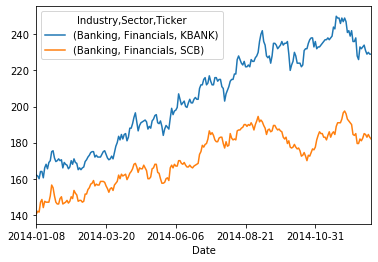

In [15]:
tbl.plot()